In [98]:
import os
import pandas as pd
%matplotlib inline

In [99]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [100]:
# Read your api key environment variable
from newsapi import NewsApiClient
from dotenv import load_dotenv
load_dotenv()
api_key = os.getenv("NEWSAPI_KEY")
type(api_key)

str

In [101]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [102]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(
    q="bitcoin",
    language="en"
)

In [103]:
bitcoin_news["totalResults"]

3497

In [104]:
# Fetch the Ethereum news articles
ether_news = newsapi.get_everything(
    q="ethereum",
    language="en"
)

In [105]:
ether_news["totalResults"]

925

In [106]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

In [107]:
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

In [108]:
cols = ["compound", "negative", "neutral", "positive", "text"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,compound,negative,neutral,positive,text
0,0.7650,0.000,0.829,0.171,J.K. Rowling has been drinking a lot and you'd...
1,0.0000,0.000,1.000,0.000,The Winklevoss twinsthe brothers Mark Zuckerbe...
2,-0.3464,0.134,0.819,0.046,If youre planning to do some protesting and yo...
3,-0.2755,0.070,0.930,0.000,Reuters\r\n<ul><li>Goldman Sachs gave five rea...
4,0.0000,0.000,1.000,0.000,<ul><li>Famed investor Michael Novogratz tweet...


In [109]:
print(bitcoin_sentiments[0])

{'text': "J.K. Rowling has been drinking a lot and you'd better believe she has some thoughts on Bitcoin.\r\nNotedTERF and author of The Cuckoos Calling, Rowlingdecided Friday was the perfect time to learn about… [+2124 chars]", 'date': '2020-05-16', 'compound': 0.765, 'positive': 0.171, 'negative': 0.0, 'neutral': 0.829}


In [110]:
# Create the ethereum sentiment scores DataFrame
ether_sentiments = []

for article in ether_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ether_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

In [111]:
ether_df = pd.DataFrame(ether_sentiments)

In [112]:
cols = ["compound", "negative", "neutral", "positive", "text"]
ether_df = ether_df[cols]

ether_df.head()

,compound,negative,neutral,positive,text
0,0.5070,0.000,0.910,0.090,Our robot colleague Satoshi Nakaboto writes ab...
1,0.0000,0.000,1.000,0.000,Editors note:Andreessen Horowitzs Crypto Start...
2,0.0000,0.000,1.000,0.000,For developers looking to quickly build identi...
3,0.0000,0.000,1.000,0.000,"Akron, Ohio, the hometown of LeBron James and ..."
4,-0.4457,0.086,0.882,0.031,"Some open-source groups, such as The Linux Fou..."


In [113]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,negative,neutral,positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.323045,0.014100,0.914350,0.071450
std,0.333264,0.036248,0.045955,0.043721
min,-0.346400,0.000000,0.819000,0.000000
25%,0.000000,0.000000,0.910000,0.045000
50%,0.507000,0.000000,0.910000,0.090000
75%,0.507000,0.000000,0.910000,0.090000
max,0.765000,0.134000,1.000000,0.171000


In [114]:
# Describe the Ethereum Sentiment
ether_df.describe()

,compound,negative,neutral,positive
count,18.000000,18.000000,18.000000,18.000000
mean,0.122700,0.030056,0.908111,0.061722
std,0.425518,0.056373,0.089093,0.077795
min,-0.670500,0.000000,0.665000,0.000000
25%,0.000000,0.000000,0.879750,0.000000
50%,0.136600,0.000000,0.910000,0.061000
75%,0.465250,0.037500,0.985750,0.089750
max,0.919800,0.184000,1.000000,0.335000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [115]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [116]:
lemmatizer = WordNetLemmatizer()

In [117]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    return tokens

In [118]:
# Create a new tokens column for bitcoin
bitcoin_tokens=[]
for article_text in bitcoin_df['text']:
    article_tokens= tokenizer(article_text)
    bitcoin_tokens.append(article_tokens)

In [119]:
bitcoin_df['tokens']=bitcoin_tokens
bitcoin_df.head()

,compound,negative,neutral,positive,text,tokens
0,0.7650,0.000,0.829,0.171,J.K. Rowling has been drinking a lot and you'd...,"[jk, rowling, ha, drinking, lot, youd, better,..."
1,0.0000,0.000,1.000,0.000,The Winklevoss twinsthe brothers Mark Zuckerbe...,"[winklevoss, twinsthe, brother, mark, zuckerbe..."
2,-0.3464,0.134,0.819,0.046,If youre planning to do some protesting and yo...,"[youre, planning, protesting, dont, want, risk..."
3,-0.2755,0.070,0.930,0.000,Reuters\r\n<ul><li>Goldman Sachs gave five rea...,"[reutersulligoldman, sachs, gave, five, reason..."
4,0.0000,0.000,1.000,0.000,<ul><li>Famed investor Michael Novogratz tweet...,"[ullifamed, investor, michael, novogratz, twee..."


In [120]:
# Create a new tokens column for ethereum
ether_tokens=[]
for article_text in ether_df['text']:
    article_tokens=tokenizer(article_text)
    ether_tokens.append(article_tokens)

In [121]:
ether_df['tokens']=ether_tokens
ether_df.head()

,compound,negative,neutral,positive,text,tokens
0,0.5070,0.000,0.910,0.090,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."
1,0.0000,0.000,1.000,0.000,Editors note:Andreessen Horowitzs Crypto Start...,"[editors, noteandreessen, horowitzs, crypto, s..."
2,0.0000,0.000,1.000,0.000,For developers looking to quickly build identi...,"[developer, looking, quickly, build, identity,..."
3,0.0000,0.000,1.000,0.000,"Akron, Ohio, the hometown of LeBron James and ...","[akron, ohio, hometown, lebron, james, seat, u..."
4,-0.4457,0.086,0.882,0.031,"Some open-source groups, such as The Linux Fou...","[opensource, group, linux, foundation, deal, o..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [122]:
from collections import Counter
from nltk import ngrams

In [123]:
# Generate the Bitcoin N-grams where N=2
bitcoin_ngram_list = []
for ngram_list in bitcoin_tokens:
    for item in ngram_list:
        bitcoin_ngram_list.append(item)

bigram_counter_bitcoin = Counter(ngrams(bitcoin_ngram_list, n=2))
dict(bigram_counter_bitcoin.most_common(10))

{('satoshi', 'nakaboto'): 26,
 ('char', 'robot'): 13,
 ('robot', 'colleague'): 13,
 ('colleague', 'satoshi'): 13,
 ('nakaboto', 'writes'): 13,
 ('writes', 'bitcoin'): 13,
 ('every', 'fucking'): 13,
 ('fucking', 'daywelcome'): 13,
 ('daywelcome', 'another'): 13,
 ('another', 'edition'): 13}

In [124]:
# Generate the Ethereum N-grams where N=2
ether_ngram_list = []
for ngram_list in ether_tokens:
    for item in ngram_list:
        ether_ngram_list.append(item)

bigram_counter_ether = Counter(ngrams(ether_ngram_list, n=2))
dict(bigram_counter_ether.most_common(10))

{('satoshi', 'nakaboto'): 8,
 ('robot', 'colleague'): 4,
 ('colleague', 'satoshi'): 4,
 ('nakaboto', 'writes'): 4,
 ('writes', 'bitcoin'): 4,
 ('bitcoin', 'btc'): 4,
 ('btc', 'every'): 4,
 ('every', 'fucking'): 4,
 ('fucking', 'daywelcome'): 4,
 ('daywelcome', 'another'): 4}

In [125]:
# Get the top 10 words for Bitcoin
bitcoin_counter=Counter(ngrams(bitcoin_ngram_list, n=1))
bitcoin_counter.most_common(10)

[(('bitcoin',), 44),
 (('satoshi',), 26),
 (('nakaboto',), 26),
 (('char',), 20),
 (('robot',), 13),
 (('colleague',), 13),
 (('writes',), 13),
 (('every',), 13),
 (('fucking',), 13),
 (('daywelcome',), 13)]

In [126]:
# Get the top 10 words for Ethereum
ether_counter=Counter(ngrams(ether_ngram_list, n=1))
ether_counter.most_common(10)

[(('char',), 18),
 (('bitcoin',), 16),
 (('satoshi',), 8),
 (('nakaboto',), 8),
 (('robot',), 4),
 (('colleague',), 4),
 (('writes',), 4),
 (('btc',), 4),
 (('every',), 4),
 (('fucking',), 4)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [127]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

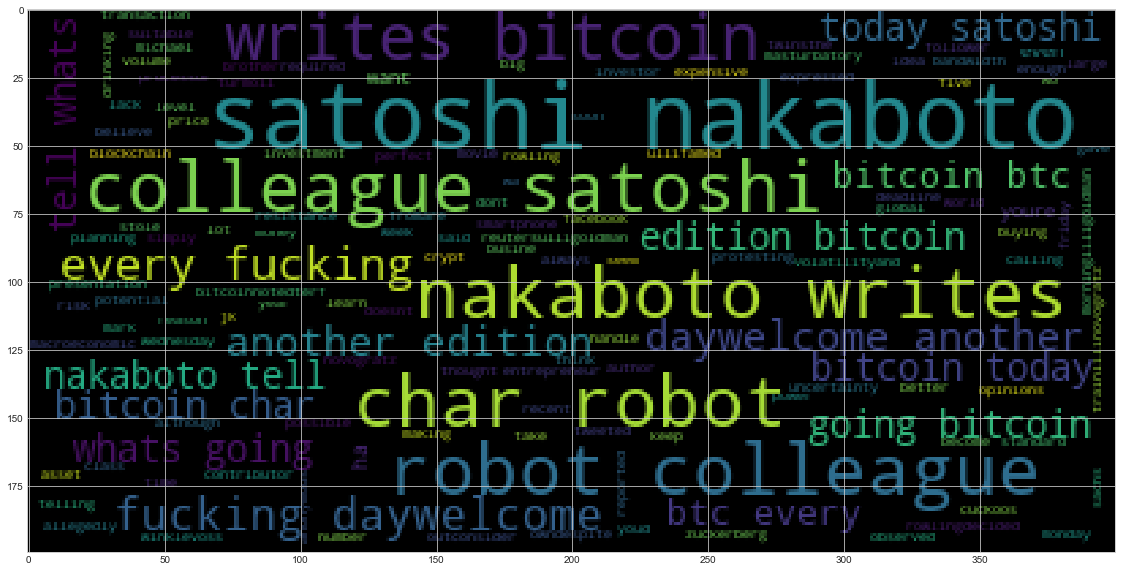

In [128]:
# Generate the Bitcoin word cloud
bitcoin_string = ' '.join([str(elem) for elem in bitcoin_ngram_list]) 
wc = WordCloud().generate(bitcoin_string)
plt.imshow(wc)

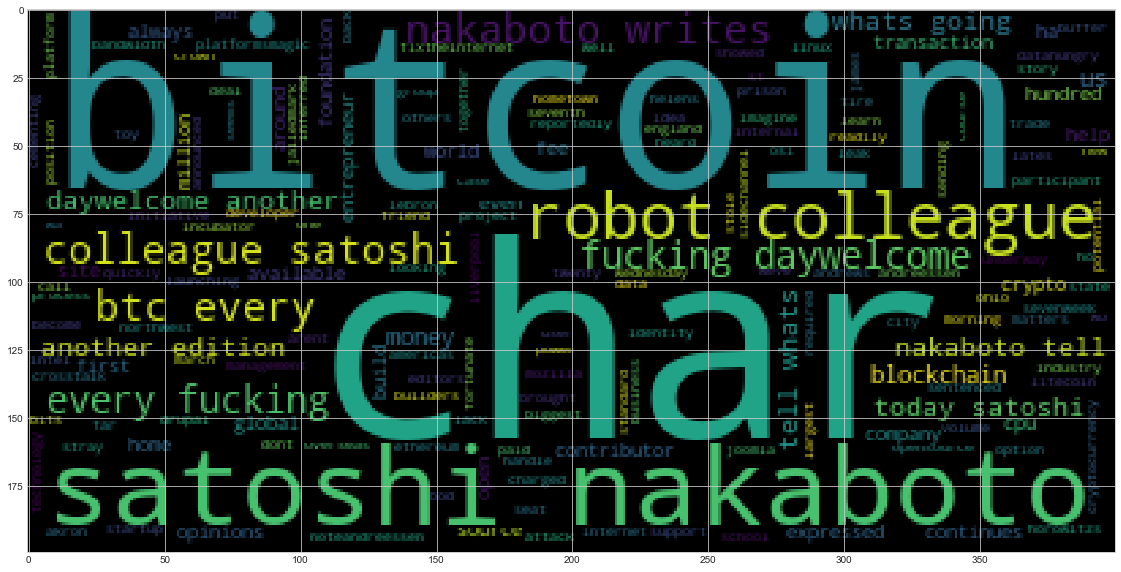

In [129]:
# Generate the Ethereum word cloud
ether_string = ' '.join([str(elem) for elem in ether_ngram_list]) 
wc = WordCloud().generate(ether_string)
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [130]:
import spacy
from spacy import displacy

In [131]:
# Optional - download a language model for SpaCy
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [132]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [133]:
# Concatenate all of the bitcoin text together
btc_concat = ' '.join(bitcoin_df["text"])

In [134]:
# Run the NER processor on all of the text
doc_btc = nlp(btc_concat)

# Add a title to the document
doc_btc.user_data["title"] = "Bitcoin NER"

In [135]:
# Render the visualization
displacy.render(doc_btc, style='ent')

In [136]:
# List all Entities
for ent in doc_btc.ents:
    print(ent.text, ent.label_)

J.K. Rowling PERSON
Bitcoin GPE
The Cuckoos Calling WORK_OF_ART
Friday DATE
The Winklevoss WORK_OF_ART
Mark Zuckerberg PERSON
Facebook ORG
Deadline PERSON
this week DATE
+2657 ORG
Reuters
 ORG
Goldman Sachs ORG
five CARDINAL
bitcoin GPE
Wednesday DATE
Goldman ORG
Michael Novogratz PERSON
Monday DATE
bitcoin GPE
$10,000 resistance MONEY
Novogratz PERSON
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
2020 DATE
a big year DATE
Bitcoin GPE
Bitcoin GPE
Bitcoin PERSON
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Na

---

## Ethereum NER

In [137]:
# Concatenate all of the bitcoin text together
eth_concat = ' '.join(ether_df['text'])

In [138]:
# Run the NER processor on all of the text
doc_eth = nlp(eth_concat)
# Add a title to the document
doc_eth.user_data["title"] = "Ethereum NER"

In [139]:
# Render the visualization
displacy.render(doc_eth, style='ent')

In [140]:
# List all Entities
for ent in doc_eth.ents:
    print(ent.text, ent.label_)

Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Andreessen Horowitzs ORG
Crypto Startup School ORG
45 CARDINAL
U.S. GPE
seven-week DATE
Andreessen Ho PERSON
Akron GPE
Ohio GPE
LeBron James PERSON
US GPE
the one hundred and twenty seventh DATE
US GPE
America GPE
first ORDINAL
The Linux Foundation ORG
Drupal Foundation ORG
OSI ORG
133 MONEY
$2.5 million MONEY
$2.5 million MONEY
Wednesday DATE
morning TIME
March DATE
1500 CARDINAL
well over a hundred CARDINAL
the Mozilla Builders Incubator ORG
more than £30,000 CARDINAL
Bitcoin GPE
Litecoin and Ethereum ORG
Mark Andrews PERSON
St Helens PERSON
England GPE
Liverpool Crown C ORG
+2411 ORG
Intel ORG
CrossTalk ORG
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bi